In [1]:
# import gdown
# gdown.download_folder('https://drive.google.com/drive/folders/1r9BARaPl-5odlOwCPE8LZJ1cFWRZGsYO?usp=sharing')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from helpers import Model , PreProcessing

In [3]:
taxiRides = pd.read_csv('‪taxi‬‏/taxi-rides.csv')
weather = pd.read_csv('‪taxi‬‏/weather.csv')

# taxiRides = pd.read_csv('/content/taxi/taxi-rides.csv')
# weather = pd.read_csv('/content/taxi/weather.csv')

In [4]:
print(f"Taxi Rides has {taxiRides.shape[0]} Rows and {taxiRides.shape[1]} Columns")
taxiRides.head()

Taxi Rides has 554456 Rows and 10 Columns


,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [5]:
print(f"Weather has {weather.shape[0]} Rows and {weather.shape[1]} Columns")
weather.head()

Weather has 6276 Rows and 8 Columns


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data Cleaning

## Taxi Rides

In [6]:
taxiRides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


## Null

In [7]:
print("Null Values in columns")
taxiRides.isnull().sum()

Null Values in columns


distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

## product_id and name

In [8]:
print(f"Value counts of 'product_id' feature\n")
taxiRides['product_id'].value_counts()

Value counts of 'product_id' feature



55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [9]:
print(f"Value counts of 'name' feature\n")
taxiRides['name'].value_counts()

Value counts of 'name' feature



UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

product_id and name represent the same feature so we can drop one of them

## Encoding Timestamps to date

In [10]:
weatherDate = pd.to_datetime(weather['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))
taxiRidesDate = pd.to_datetime(taxiRides['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y-%m-%d')))
weather['date'] = weatherDate
taxiRides['date'] = taxiRidesDate

In [11]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30


In [12]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16


In [13]:
taxiRides.drop(['time_stamp'],axis = 1, inplace = True)
weather.drop(['time_stamp'],axis = 1, inplace = True)

## Joining Dataframes based on date

In [14]:
mergedData = pd.merge(taxiRides,weather.drop_duplicates(subset=['date', 'location']), how = 'left', left_on=['date', 'source'], right_on=['date', 'location'])

In [15]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,id,product_id,name,price,date,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,Uber,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,27.34,Haymarket Square,0.15,1033.40,NaN,0.81,3.04
1,2.27,Uber,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,33.67,Beacon Hill,0.12,991.20,NaN,0.82,5.37
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,42.34,Haymarket Square,1.00,1012.15,0.2068,0.77,11.49
3,3.98,Lyft,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31
4,1.49,Lyft,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31


## Rain Feature

In [16]:
weather['rain'].isnull().sum() / weather['rain'].shape[0]

0.8575525812619503

<AxesSubplot:>

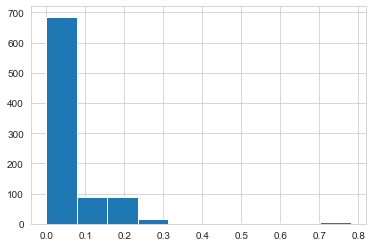

In [17]:
weather['rain'].hist()

Does null values of rain revolve around certain values?

In [18]:
print("Rows with null rain value statistics")
weather[weather['rain'].isnull()].describe()

Rows with null rain value statistics


,temp,clouds,pressure,rain,humidity,wind
count,5382.000000,5382.000000,5382.00000,0.0,5382.000000,5382.000000
mean,38.461557,0.633618,1008.92490,NaN,0.747293,6.375199
std,6.169892,0.312919,13.46695,NaN,0.124451,3.542713
min,19.620000,0.000000,988.25000,NaN,0.450000,0.290000
25%,35.022500,0.400000,997.39000,NaN,0.660000,3.190000
50%,39.360000,0.680000,1009.56000,NaN,0.730000,6.210000
75%,41.470000,0.930000,1020.95000,NaN,0.850000,9.627500
max,55.410000,1.000000,1035.12000,NaN,0.990000,18.180000


In [19]:
print("Rows with non-null rain value statistics")
weather[weather['rain'].notna()].describe()

Rows with non-null rain value statistics


,temp,clouds,pressure,rain,humidity,wind
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,42.876644,0.943624,1005.557405,0.057652,0.864474,9.377103
std,2.951239,0.146752,7.841618,0.100758,0.093957,3.066719
min,34.100000,0.100000,988.910000,0.000200,0.520000,1.740000
25%,41.482500,0.970000,999.750000,0.004900,0.860000,7.660000
50%,43.820000,1.000000,1005.945000,0.014850,0.900000,9.890000
75%,44.510000,1.000000,1011.237500,0.060925,0.920000,11.187500
max,51.240000,1.000000,1021.790000,0.780700,0.980000,17.160000


In [20]:
weather['rain'].value_counts()

0.0030    85
0.0020    51
0.0040    23
0.0060    17
0.0050    15
          ..
0.1370     1
0.0664     1
0.7222     1
0.0223     1
0.1561     1
Name: rain, Length: 437, dtype: int64

In [21]:
print(f"Values of 0 in the rain feature {(weather['rain'] == 0).sum()}")

Values of 0 in the rain feature 0


Rain feature nulls could indicate no rain

In [22]:
mergedData.isnull().sum()

distance                 0
cab_type                 0
destination              0
source                   0
surge_multiplier         0
id                       0
product_id               0
name                     0
price                44135
date                     0
temp                     0
location                 0
clouds                   0
pressure                 0
rain                480515
humidity                 0
wind                     0
dtype: int64

# Data Visualization

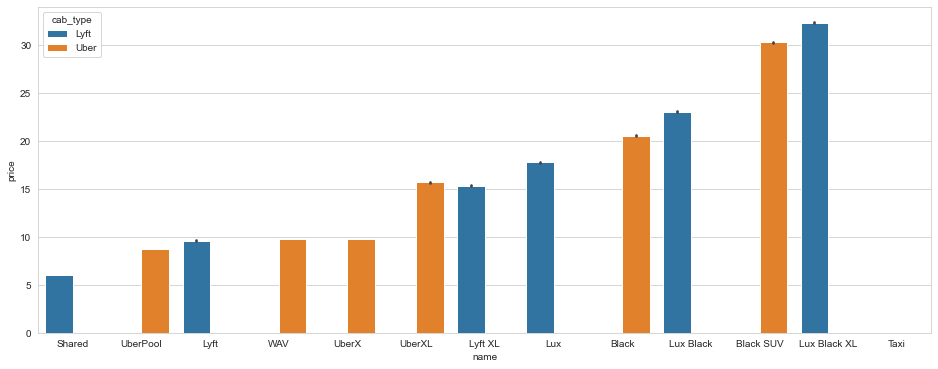

In [23]:
# to make the bars sorted
mergedData.sort_values('price', inplace=True)

plt.figure(figsize =(16,6))
sns.barplot(data=mergedData,x='name',y='price',hue='cab_type')
plt.show()

Apparently all *price* values of *Taxi* are missing, could all the missing values from *price* be from the *taxi* cab type? we need to verify this

In [24]:
taxiNullValues = mergedData[mergedData['price'].isnull()]['name'].value_counts()['Taxi']
totalNullValues = mergedData.isnull().sum()['price']
print(f"There are {taxiNullValues} price null values with Taxi as subtype from a total of {totalNullValues} \
: {taxiNullValues / totalNullValues * 100}%")

There are 44135 price null values with Taxi as subtype from a total of 44135 : 100.0%


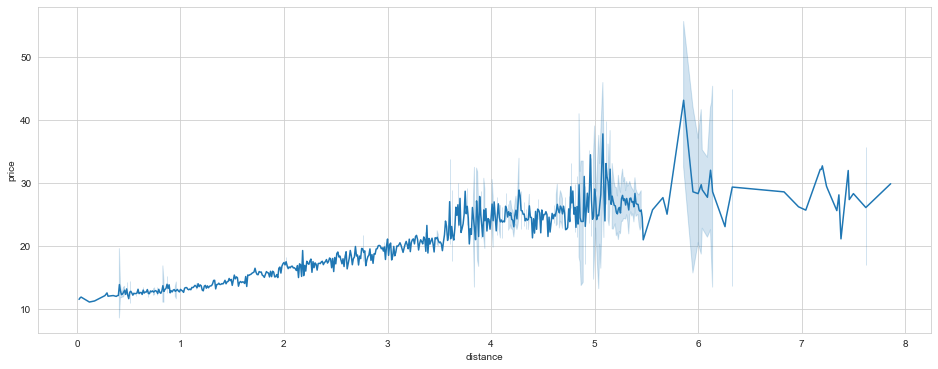

In [25]:
plt.figure(figsize =(16,6))
sns.lineplot(data=mergedData,x='distance',y='price')
plt.show()

Price as expected increases with distance, however there are some spikes that must have other factors contributing in

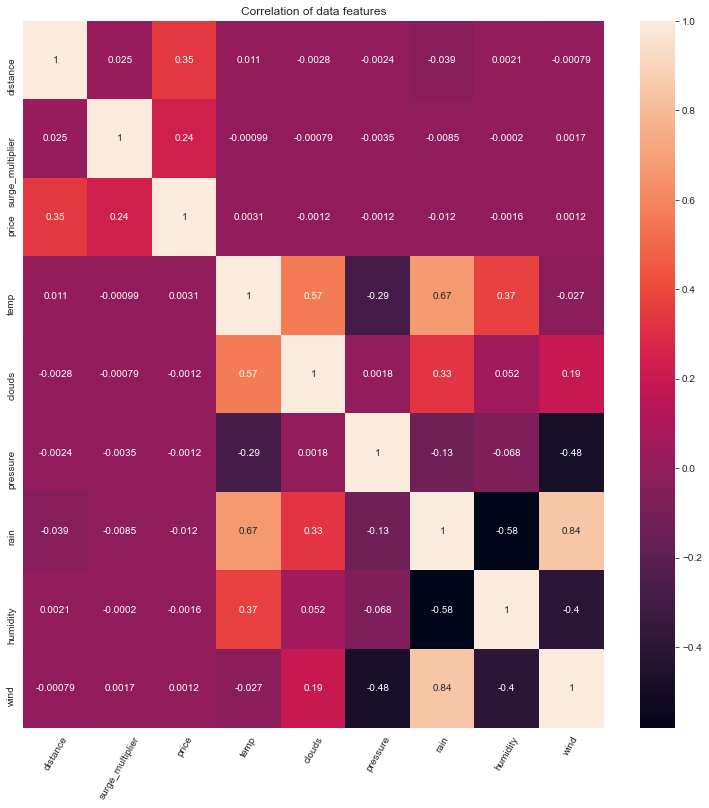

In [26]:
plt.figure(figsize = (13, 13))
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlation of data features')
sns.heatmap(mergedData.corr(), annot = True)
plt.show()

## Weather Graphs

<Figure size 1152x432 with 0 Axes>

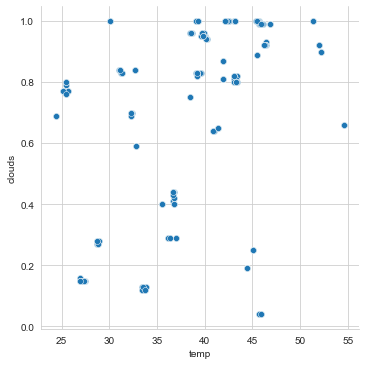

In [27]:
plt.figure(figsize =(16,6))
sns.relplot(data=mergedData,x='temp',y='clouds')
plt.show()

<Figure size 1152x432 with 0 Axes>

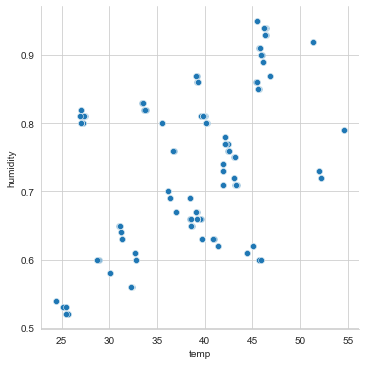

In [28]:
plt.figure(figsize =(16,6))
sns.relplot(data=mergedData,x='temp',y='humidity')
plt.show()

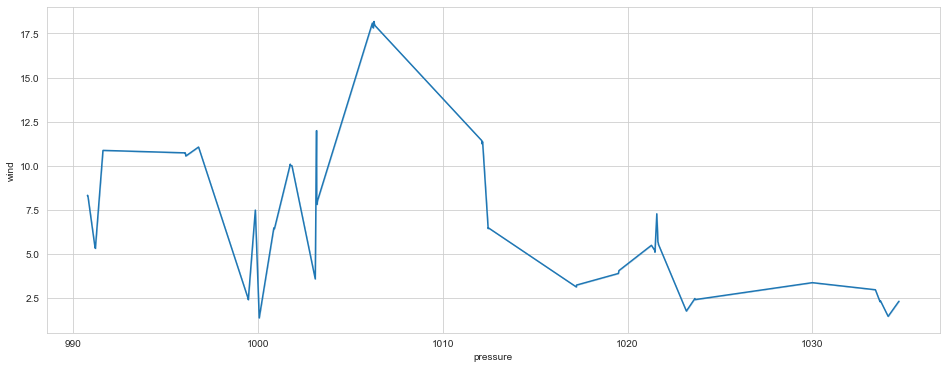

In [29]:
plt.figure(figsize =(16,6))
sns.lineplot(data=mergedData,x='pressure',y='wind')
plt.show()

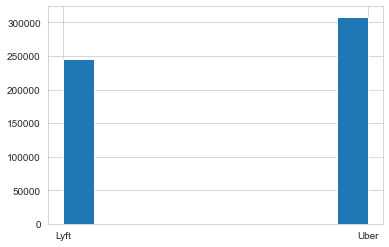

In [30]:
mergedData['cab_type'].hist()
plt.show()

<AxesSubplot:>

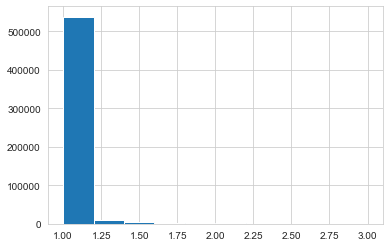

In [31]:
mergedData['surge_multiplier'].hist()

# Preprocessing

## Encoding

###  <i>name</i> Feature

In [32]:
preProcessing = PreProcessing()
preProcessing.encode_name(mergedData['name'])

In [33]:
preProcessing.drop_adjust(mergedData)

### Other Features

In [34]:
nonIntegerColumns = [col for col in mergedData.columns if mergedData[col].dtypes == object]
print(f"Non Integer Columns : {nonIntegerColumns}")

Non Integer Columns : ['cab_type', 'destination', 'source']


In [35]:
preProcessing.encode(mergedData,nonIntegerColumns)

In [36]:
mergedData.dropna(axis=0, subset=['price'], inplace=True)

In [37]:
mergedData.isnull().sum()


distance                 0
cab_type                 0
destination              0
source                   0
surge_multiplier         0
ride_class               0
price                    0
temp                     0
clouds                   0
pressure                 0
rain                442311
humidity                 0
wind                     0
dtype: int64

## Rain feature


In [38]:
mergedData['rain'].fillna(0,inplace=True)

In [39]:
mergedData['rain'].describe()

count    510321.000000
mean          0.011510
std           0.039019
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.208800
Name: rain, dtype: float64

Referring to google:
<blockquote>Light rainfall is considered <b>less than 0.10 inches</b> of rain per hour. Moderate rainfall measures <b>0.10 to 0.30 inches</b> of rain per hour. Heavy rainfall is more than <b>0.30 inches</b>
 of rain per hour.</blockquote>
0 : no rain <br>
1 : light rain <br>
2 : mid rain <br>
3 : heavy rain (doesn't exist in the data)

In [40]:
mergedData['rainType'] = 0

In [41]:
mergedData['rainType'][(mergedData['rain'] > 0) & (mergedData['rain'] < 0.1)] = 1

<ipython-input-41-79a02e6b1ff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['rainType'][(mergedData['rain'] > 0) & (mergedData['rain'] < 0.1)] = 1


In [42]:
mergedData['rainType'][(mergedData['rain'] > 0.1) & (mergedData['rain'] < 0.3)] = 2

<ipython-input-42-8c1d46e23a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['rainType'][(mergedData['rain'] > 0.1) & (mergedData['rain'] < 0.3)] = 2


In [43]:
mergedData['rainType'].value_counts()

0    442311
1     39496
2     28514
Name: rainType, dtype: int64

## Clouds engineering
making the assumption that clouds are on normalized [Okta Scale](https://polarpedia.eu/en/okta-scale/) that means values less than 0.1 are sunny days

In [44]:
mergedData['sunnyDay'] = 0

In [45]:
mergedData['sunnyDay'][mergedData['clouds'] <= 0.1] = 1

<ipython-input-45-396d80b99211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['sunnyDay'][mergedData['clouds'] <= 0.1] = 1


In [46]:
mergedData['sunnyDay'].value_counts()

0    502981
1      7340
Name: sunnyDay, dtype: int64

## Outliers

In [47]:
standardPrice = (mergedData['price'] - mergedData['price'].mean()) / mergedData['price'].std()

In [48]:
priceOutliers = mergedData[((standardPrice > 3.5) | (standardPrice < -3.5))]
print(len(priceOutliers))

1670


In [49]:
print("Value counts of surge_multipliers for outlier prices\n")
priceOutliers['surge_multiplier'].value_counts()

Value counts of surge_multipliers for outlier prices



2.00    548
1.50    345
1.75    306
1.00    300
1.25    157
2.50     12
3.00      2
Name: surge_multiplier, dtype: int64

In [50]:
print("Value counts of cab_class for outlier prices with normal surge_multipliers\n")
priceOutliers[priceOutliers['surge_multiplier'] == 1.0]['ride_class'].value_counts()

Value counts of cab_class for outlier prices with normal surge_multipliers



4    276
2     14
3     10
Name: ride_class, dtype: int64

## Dimentionality Reduction

In [51]:
subsetOfData = mergedData[['temp','sunnyDay','rainType','wind','pressure','humidity']]
mergedData.drop(['temp','clouds','sunnyDay','rain','rainType','wind','pressure','humidity'],axis=1,inplace=True)

In [52]:
lowerDimensionWeatherData =preProcessing.reduceDimentionsOf(subsetOfData)
mergedData['weatherState'] = lowerDimensionWeatherData

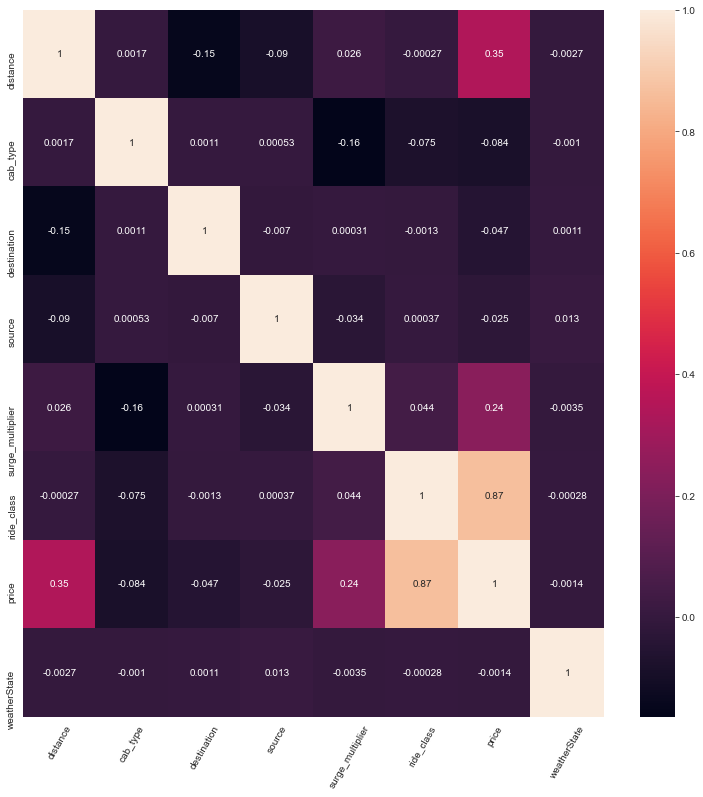

In [53]:
plt.figure(figsize = (13, 13))
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
sns.heatmap(mergedData.corr(), annot = True)
plt.show()

# Model

In [54]:
dataFeatures = mergedData.drop(['price'],axis=1)
dataLabel = mergedData['price']

In [55]:
dataFeatures.head()

,distance,cab_type,destination,source,surge_multiplier,ride_class,weatherState
538883,2.33,0,2,1,1.0,1,-7.069296
346062,0.98,0,7,6,1.0,1,-13.164757
270683,1.73,0,5,10,1.0,1,26.184353
171673,1.52,0,2,0,1.0,1,2.104307
401607,0.73,0,5,7,1.0,1,-2.179213


In [56]:
model = Model()

### First Model

In [57]:
splitData = model.splitData(dataFeatures,dataLabel)

In [58]:
linearModel = model.fitLinearModel(splitData["trainFeatures"],
                     splitData["trainLabel"],
                     metrics.r2_score,
                     splitData["testFeatures"],
                     splitData["testLabel"])

Final model r2_score on train: 0.9075297646007208
Final model r2_score on validation: 0.9088509105957402


### Second Model

In [59]:
polyDegree = 4
polyModel = model.fitPolyModel(splitData["trainFeatures"],
                    splitData["trainLabel"],
                    polyDegree,
                    metrics.r2_score,
                    splitData["testFeatures"],
                    splitData["testLabel"])

Final model r2_score on train: 0.9543188084878254
Final model r2_score on validation: 0.9549287274735376


In [60]:
model.crossValidateOn(linear_model.LinearRegression(),
                      dataFeatures,
                      dataLabel,
                      polyDegree,
                      metric = metrics.r2_score, k = 3)

Average Score : -14.788631320596494


In [61]:
models = {
    'polyModel': polyModel,
    'linearModel': linearModel
}

In [62]:
imputers = {}
for feature in taxiRides.columns:
    if taxiRides[feature].dtype == object:
        imputers[feature]=taxiRides[feature].mode()
    else:
        imputers[feature]=taxiRides[feature].mean()

In [63]:
classification_cache ={
    'models': models,
    'encoders': preProcessing.encoders,
    'imputers': imputers
}

In [64]:
from pickle import dump
filename = 'regression_cache'
dump(classification_cache, open('regression_cache', 'wb'))